In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import os

In [43]:
df = pd.read_csv('collegePlace.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Certification,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Certification      2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [45]:
df.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Certification        0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [46]:
df.Stream.unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

# Plotting all the Columns to see the behavior of the Dataset

<Axes: xlabel='Stream', ylabel='PlacedOrNot'>

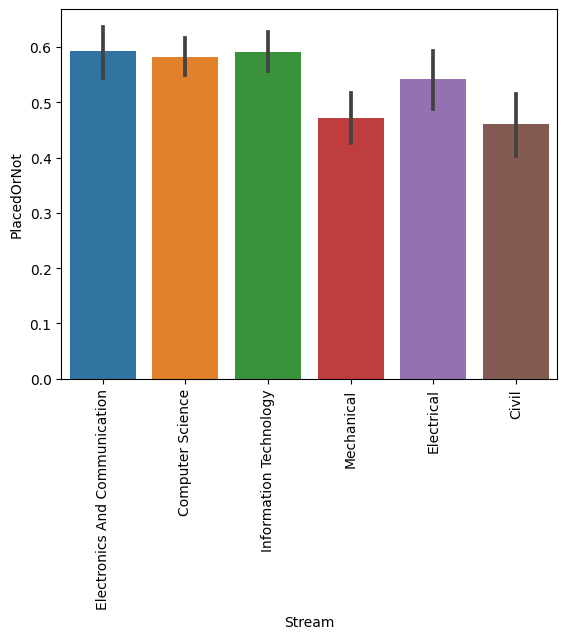

In [47]:
plt.xticks(rotation=90)
sns.barplot(x=df.Stream, y=df.PlacedOrNot)

In [48]:
df.Age.unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29], dtype=int64)

<Axes: xlabel='Age', ylabel='PlacedOrNot'>

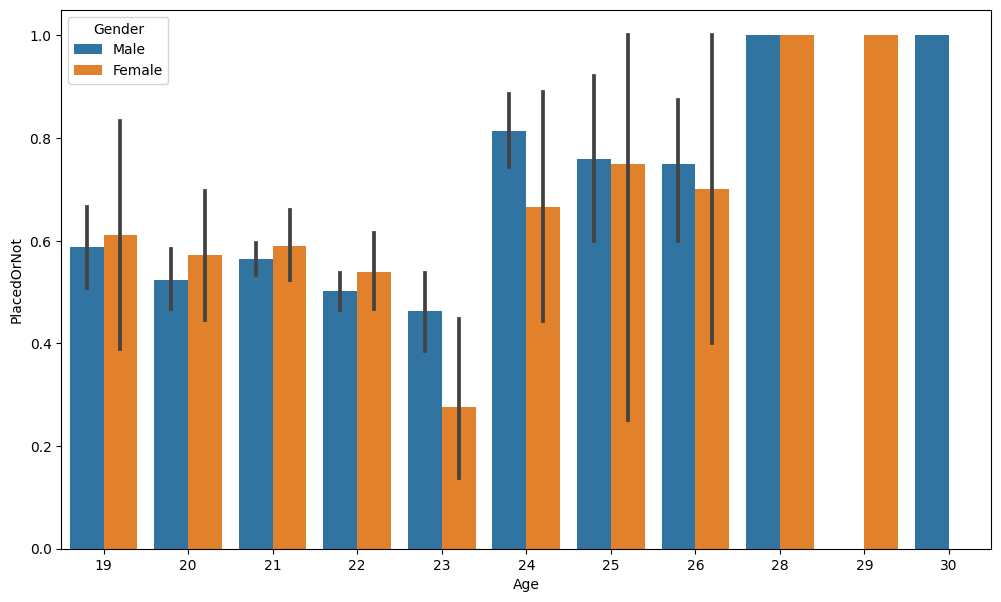

In [49]:
plt.figure(figsize=(12, 7))
sns.barplot(x=df.Age, y=df.PlacedOrNot, hue=df.Gender)

<Axes: xlabel='Age', ylabel='count'>

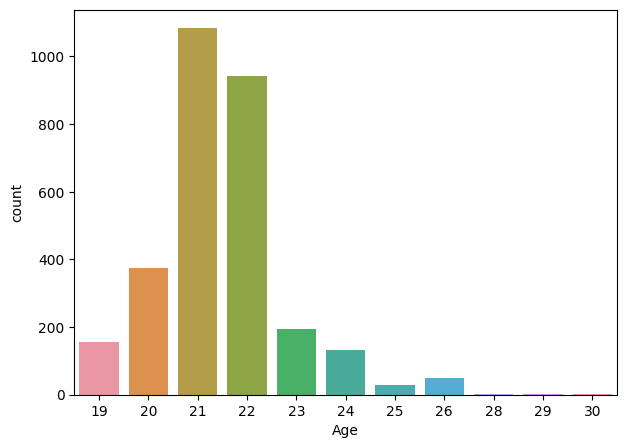

In [50]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df.Age)

<Axes: xlabel='Internships', ylabel='PlacedOrNot'>

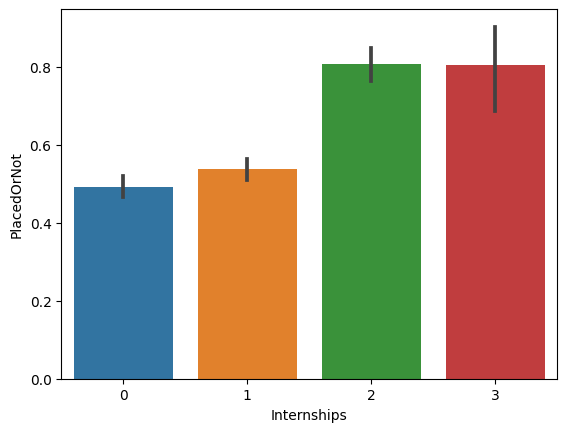

In [51]:
df.Age.value_counts()
sns.barplot(x=df.Internships, y=df.PlacedOrNot)

In [52]:
df.Internships.value_counts()

0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64

In [53]:
df.CGPA.value_counts()

7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64

<Axes: xlabel='CGPA', ylabel='PlacedOrNot'>

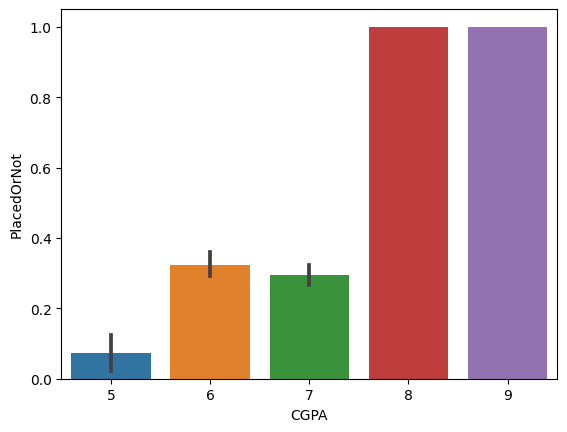

In [54]:
sns.barplot(x=df.CGPA, y=df.PlacedOrNot)

<Axes: xlabel='Certification', ylabel='PlacedOrNot'>

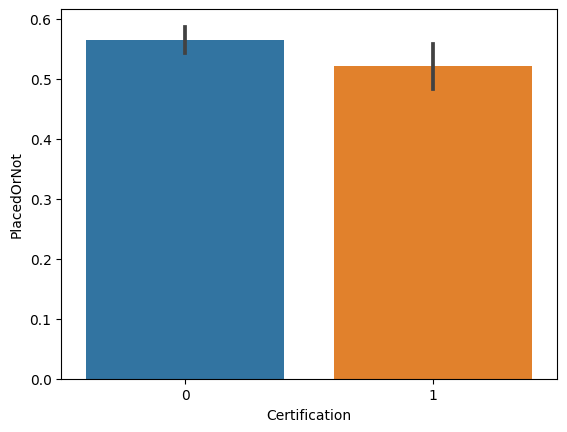

In [55]:
sns.barplot(x=df.Certification, y=df.PlacedOrNot)

<Axes: xlabel='Gender', ylabel='PlacedOrNot'>

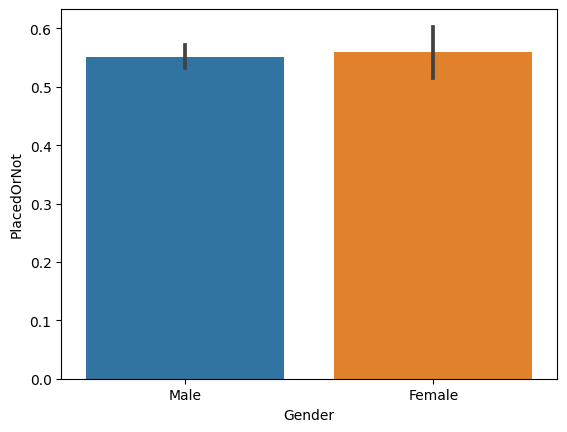

In [56]:
sns.barplot(x=df.Gender, y=df.PlacedOrNot)

<Axes: xlabel='HistoryOfBacklogs', ylabel='PlacedOrNot'>

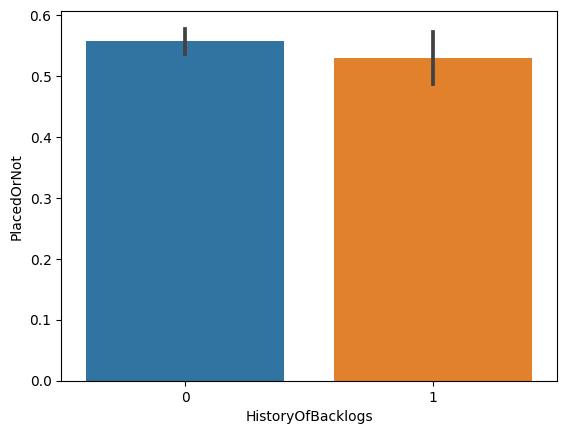

In [57]:
sns.barplot(x=df.HistoryOfBacklogs, y=df.PlacedOrNot)

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Stream = le.fit_transform(df.Stream)

# Dropping Placed or not for x as x will be trained

In [59]:
# df = df.drop(['Certification'], axis=1)
x = df.drop(['PlacedOrNot'], axis=1)
y = df.PlacedOrNot

In [60]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [79]:
cross_val_score(SVC(), x, y, cv=3)
cross_val_score(DecisionTreeClassifier(), x, y, cv=3)
cross_val_score(LogisticRegression(), x, y, cv=3)
cross_val_score(RandomForestClassifier(n_estimators=50), x, y, cv=3)
cross_val_score(KNeighborsClassifier(), x, y, cv=3)

array([0.82912032, 0.81193124, 0.88259109])

# Random Forest Classifier

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

<Axes: >

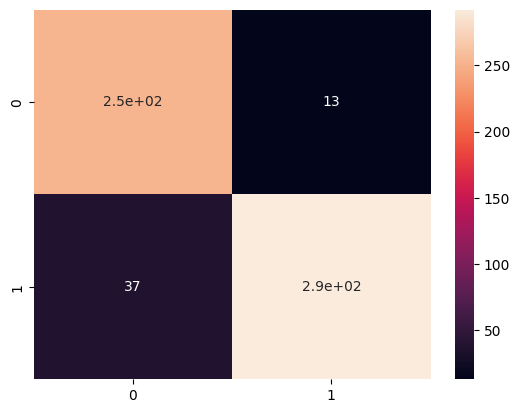

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [111]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9158249158249159


In [112]:
import pickle
# Mount Google Drive to the Colab instance
#drive.mount('/content/drive')
# Save the trained model to a file
with open('rf.pkl', 'wb') as file:
    pickle.dump(rf , file)
# Load the saved model
with open('rf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gb_model = GradientBoostingClassifier() # Initialize the Gradient Boosting model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [92]:
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)  # Calculate accuracy for the Gradient Boosting model

In [93]:
print("Accuracy using Gradient Boosting:", accuracy_gb)

Accuracy using Gradient Boosting: 0.8754208754208754


In [94]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [95]:
y_pred_rf = model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

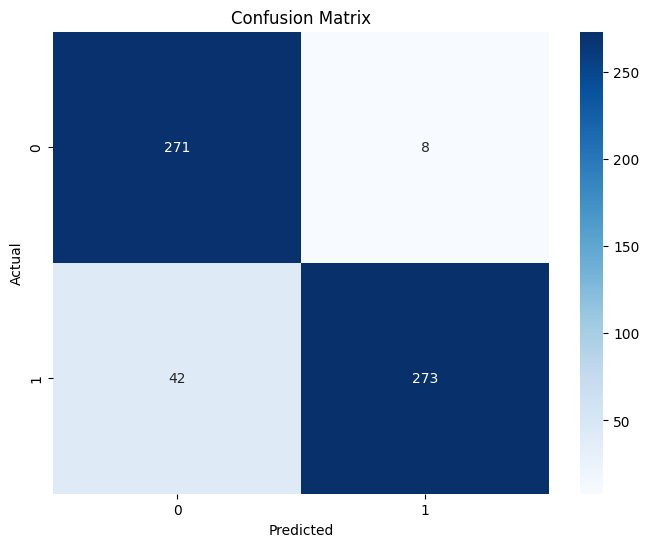

In [96]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [97]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

In [98]:
models = ['Random Forest', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_gb]

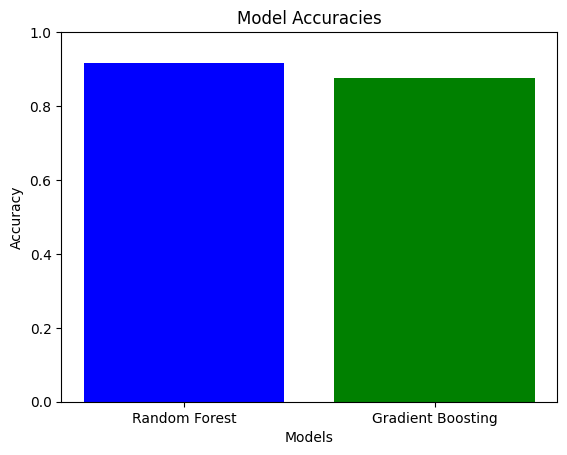

In [99]:
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1) 
plt.show()

# Decision trees

In [100]:
dt = DecisionTreeClassifier()
cross_val_scores = cross_val_score(model, x, y, cv=3)
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

Cross-validation scores: [0.84428716 0.84428716 0.91396761]
Mean accuracy: 0.8675139762761498


In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
# Training the Decision Tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

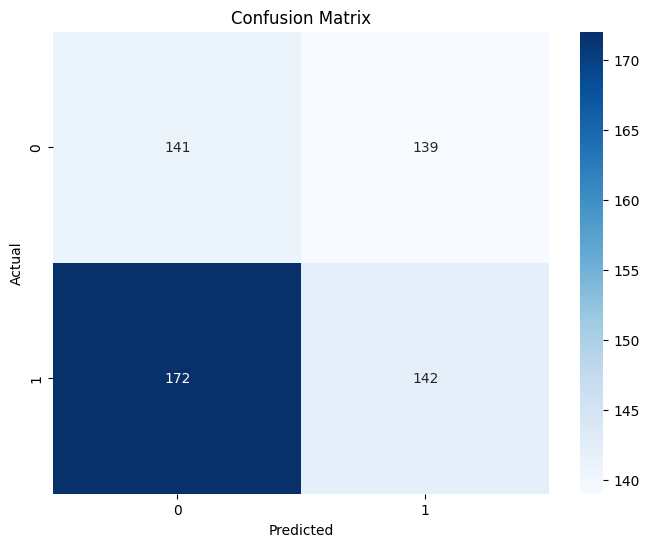

In [103]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# SVM

In [104]:
svm_model = SVC()
svm_scores = cross_val_score(svm_model, x, y, cv=3)
svm_accuracy = svm_scores.mean()
print("SVM Cross-validation scores:", svm_scores)
print("SVM Mean accuracy:", svm_accuracy)

SVM Cross-validation scores: [0.73609707 0.76238625 0.84817814]
SVM Mean accuracy: 0.7822204847110387
